Instructions:
1. Choose a unique dataset from: https://archive.ics.uci.edu
2. Your dataset should be unique from your classmates otherwise no points will be given for this exercise.
### Complete the Tasks in bold

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
zoo = fetch_ucirepo(id=111) 
  
# data (as pandas dataframes) 
X = zoo.data.features 
y = zoo.data.targets 
  
# metadata 
print(zoo.metadata) 
  
# variable information 
print(zoo.variables) 


{'uci_id': 111, 'name': 'Zoo', 'repository_url': 'https://archive.ics.uci.edu/dataset/111/zoo', 'data_url': 'https://archive.ics.uci.edu/static/public/111/data.csv', 'abstract': 'Artificial, 7 classes of animals', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 101, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['type'], 'index_col': ['animal_name'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1990, 'last_updated': 'Fri Sep 15 2023', 'dataset_doi': '10.24432/C5R59V', 'creators': ['Richard Forsyth'], 'intro_paper': None, 'additional_info': {'summary': 'A simple database containing 17 Boolean-valued attributes.  The "type" attribute appears to be the class attribute.  Here is a breakdown of which animals are in which type: (I find it unusual that there are 2 instances of "frog" and one of "girl"!)', 'purpose': None, 'funded_by': None, 'inst

## Data Exploration

**TASK: Create a correlation heatmap.**

**TASK: What are the top 5 correlated frequencies with the target\label?**

*Note: You many need to map the label to 0s and 1s.*

*Additional Note: We're looking for **absolute** correlation values.*

{'uci_id': 111, 'name': 'Zoo', 'repository_url': 'https://archive.ics.uci.edu/dataset/111/zoo', 'data_url': 'https://archive.ics.uci.edu/static/public/111/data.csv', 'abstract': 'Artificial, 7 classes of animals', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 101, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['type'], 'index_col': ['animal_name'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1990, 'last_updated': 'Fri Sep 15 2023', 'dataset_doi': '10.24432/C5R59V', 'creators': ['Richard Forsyth'], 'intro_paper': None, 'additional_info': {'summary': 'A simple database containing 17 Boolean-valued attributes.  The "type" attribute appears to be the class attribute.  Here is a breakdown of which animals are in which type: (I find it unusual that there are 2 instances of "frog" and one of "girl"!)', 'purpose': None, 'funded_by': None, 'inst

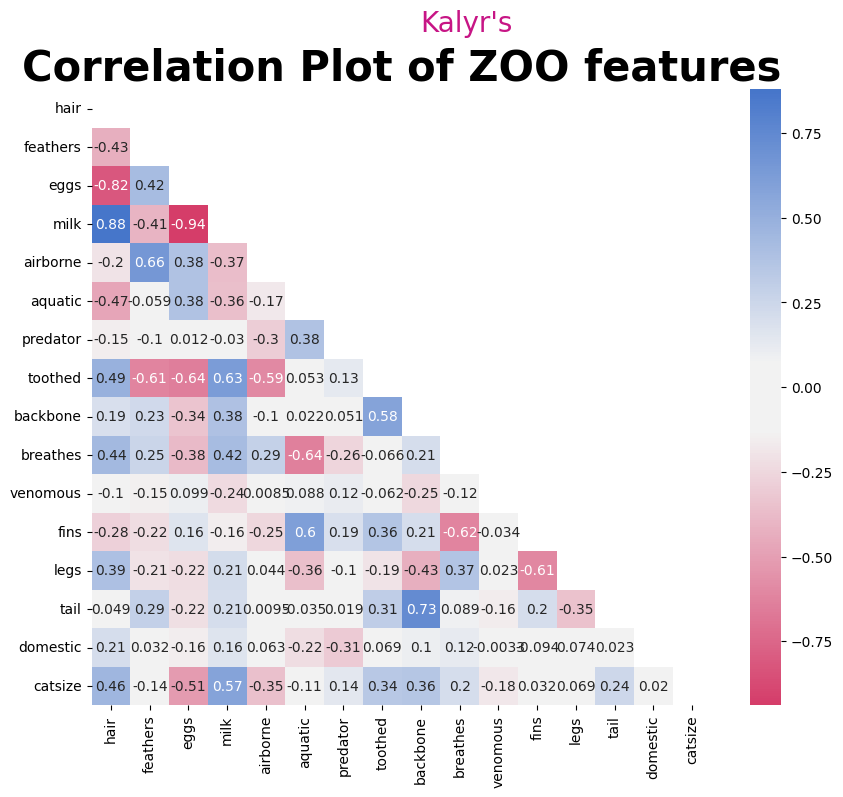

In [3]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Fetch the dataset
zoo = fetch_ucirepo(id=111) 

# Print metadata and variable information
print(zoo.metadata) 

# Convert data to pandas dataframes
X = pd.DataFrame(zoo.data.features, columns=zoo.metadata.feature_names)
y = pd.DataFrame(zoo.data.targets, columns=zoo.metadata.target_names)

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y.squeeze())

# Combine features and target into a single dataframe
data = pd.concat([X, pd.Series(y, name='target')], axis=1)

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(X.corr(), dtype=bool))
cmap = sns.diverging_palette(0, 255, sep=30, n=256, as_cmap=True)
sns.heatmap(X.corr(), annot=True, cmap=cmap, mask=mask)
plt.suptitle("Kalyr's", color='mediumvioletred', fontsize=20)
plt.title('Correlation Plot of ZOO features', fontsize=30, fontweight='bold')
plt.show()

# # Find the top 5 features with highest absolute correlation with the target
# abs_corr = abs(corr['target']).drop('target')
# top_corr_features = abs_corr.sort_values(ascending=False)[:5]
# print(f"\nTop 5 features with highest absolute correlation with the target:")
# print(top_corr_features)

## Train | Test Split

Our approach here will be one of using Cross Validation on 90% of the dataset, and then judging our results on a final test set of 10% to evaluate our model.

**TASK: Split the data into features and labels, and then split into a training set and test set, with 90% for Cross-Validation training, and 10% for a final test set.**

*Note: Do not forget to put a random_state for reproducibility.*

In [1]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Fetch the dataset
zoo = fetch_ucirepo(id=863)

# Convert data to pandas dataframes
X = pd.DataFrame(zoo.data.features, columns=zoo.metadata.feature_names)
y = pd.DataFrame(zoo.data.targets, columns=zoo.metadata.target_names)

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y.squeeze())

# Split the data into features and labels
X_features = X
y_labels = y

# Split the data into a training set (90%) and a test set (10%)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.1, random_state=42)

print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(912, 6), y_train=(912,)
Test set shape: X_test=(102, 6), y_test=(102,)


**TASK: Create a PipeLine that contains both a StandardScaler and a KNN model**

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create a pipeline with StandardScaler and KNN model
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Print the pipeline steps
print(knn_pipeline.steps)


[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]


**TASK: Perform a grid-search with the pipeline to test various values of k and report back the best performing parameters.**

In [7]:
from sklearn.model_selection import GridSearchCV

# Create a parameter grid for KNN
param_grid = {'knn__n_neighbors': range(1, 21)}

# Create a grid search object with the pipeline
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the grid search object on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'knn__n_neighbors': 1}
Best Score:  0.8267699513601153


**(HARD) TASK: Using the .cv_results_ dictionary, see if you can create a plot of the mean test scores per K value.**

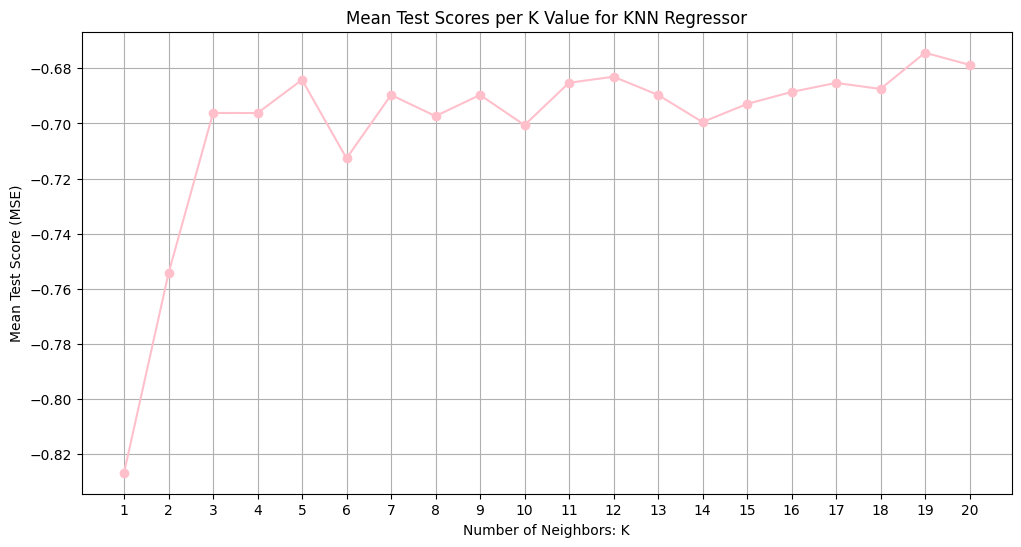

In [10]:
import matplotlib.pyplot as plt

cv_results = grid_search.cv_results_
mean_test_scores = cv_results['mean_test_score']
k_values = [param['knn__n_neighbors'] for param in cv_results['params']]

plt.figure(figsize=(12, 6))
plt.plot(k_values, -mean_test_scores, marker='o', color='pink') 

plt.title('Mean Test Scores per K Value for KNN Regressor')

plt.xlabel('Number of Neighbors: K')
plt.ylabel('Mean Test Score (MSE)')

plt.xticks(k_values)

plt.grid(True)
plt.show()

### Final Model Evaluation

**TASK: Using the grid classifier object from the previous step, get a final performance classification report and confusion matrix.**

In [9]:
from sklearn.metrics import classification_report, confusion_matrix

# Get the best estimator from the grid search
best_estimator = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_estimator.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.96      0.87        27
           1       0.90      0.65      0.75        40
           2       0.78      0.89      0.83        35

    accuracy                           0.81       102
   macro avg       0.82      0.83      0.82       102
weighted avg       0.83      0.81      0.81       102


Confusion Matrix:
[[26  1  0]
 [ 5 26  9]
 [ 2  2 31]]
